<a href="https://colab.research.google.com/github/ClauCll/Curso_ML_A_Z/blob/master/Regresi%C3%B3n/Regresion_Bajas_Antiguedad_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cuantas serán las bajas voluntarias de los clientes fijos para un periodo x. (Agosto - Diciembre 2020)
 

In [85]:
import pandas as pd
import numpy as np

#Gráfico
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt 
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

import gspread
from oauth2client.client import GoogleCredentials 
from google.colab import auth
# Autoriza Claudia
auth.authenticate_user()
gc = gspread.authorize (GoogleCredentials.get_application_default())

### leemos datos

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
data = pd.read_csv('/content/drive/My Drive/Dataset/BAJAS.txt',delimiter='~')
data = data[['MES_BAJA','TRIM_1','TRIM_2','TRIM_3','TRIM_4','ENTRE_1_2_ANIOS','ENTRE_3_4_ANIOS','MAS_5_ANIOS','TOTAL_BAJAS']]
data = data.groupby(['MES_BAJA']).agg({"MES_BAJA":'mean',"TRIM_1": 'mean',"TRIM_2": 'mean',
                                "TRIM_3": 'mean',"TRIM_4": 'mean',  
                                "ENTRE_1_2_ANIOS": 'mean',"ENTRE_3_4_ANIOS": 'mean',
                                "MAS_5_ANIOS": 'mean',"TOTAL_BAJAS": 'mean'})
X  = data.iloc[:,:-1].values
Y  = data.iloc[:,8]
Y = Y[:,np.newaxis]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':


In [98]:
data

,MES_BAJA,TRIM_1,TRIM_2,TRIM_3,TRIM_4,ENTRE_1_2_ANIOS,ENTRE_3_4_ANIOS,MAS_5_ANIOS,TOTAL_BAJAS
MES_BAJA,,,,,,,,,
1,1,31.0,22.0,21.5,271.0,727.5,399.0,19.0,1491.0
2,2,38.5,18.5,31.5,343.0,924.5,511.0,21.5,1888.5
3,3,47.5,24.0,24.5,239.5,736.0,424.0,38.0,1533.5
4,4,44.5,23.5,19.5,172.5,546.0,318.0,28.5,1152.5
5,5,56.0,20.0,24.0,202.5,545.5,313.5,21.0,1182.5
6,6,54.0,35.0,22.5,174.0,672.0,369.0,57.5,1384.0
7,7,59.5,43.5,26.5,166.0,679.5,382.5,72.5,1430.0
8,8,19.0,18.0,19.0,168.0,590.0,294.0,6.0,1114.0
9,9,26.0,19.0,20.0,142.0,498.0,316.0,10.0,1031.0


In [106]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
# 1trim
#entrenamos datos
x1 = X[:,0]
x1 = x1[:,np.newaxis]
y1 = X[:,1]
y1 = y1[:,np.newaxis]

x_train, x_test, y_train, y_test = train_test_split(x1, y1,train_size = 0.8,
                                        random_state = 0,
                                        shuffle      = True
                                    )
#escalamos los datos
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train = sc_x.fit_transform(x_train)
y_train= sc_y.fit_transform(y_train)
x_test = sc_x.fit_transform(x_test)
y_test= sc_y.fit_transform(y_test)

#aplicando modelo svm
svr= SVR(kernel='rbf',degree=3, C=1.0, epsilon=0.2)
svr.fit(x_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [107]:
x_valor=sc_x.inverse_transform(x_train)
y_valor= sc_y.inverse_transform(y_train)
y_predic_valor= sc_y.inverse_transform(svr.predict(x_train))
y_predic_valor

array([50.22790588, 56.20731471, 46.7959962 , 53.2532425 , 47.68568031,
       48.01223936, 57.85042515, 50.38472232, 54.42429761])

In [108]:
pd.DataFrame(y_valor)

,0
0,51.742380
1,60.714196
2,45.282673
3,54.254488
4,40.258456
5,47.435908
6,58.560960
7,48.871399
8,65.379540


In [109]:
x_valor_t=sc_x.inverse_transform(x_test)
y_valor_t= sc_y.inverse_transform(y_test)
y_predic_valor_t= sc_y.inverse_transform(svr.predict(x_test))
y_predic_valor_t

array([57.51431081, 49.55979001, 54.71690563])

In [110]:
pd.DataFrame(y_valor_t)

,0
0,59.5
1,42.0
2,56.0


In [111]:
#score
print(svr.score(x_train,y_train))
print(svr.score(x_test,y_test))

0.6030973523074987
0.634170741910758


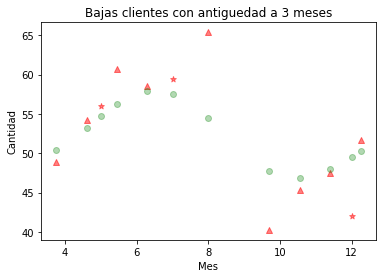

In [112]:
plt.scatter(x_valor, y_valor, c='red', marker='^', alpha=0.5)
plt.scatter(x_valor_t , y_valor_t , c='red', marker='*', alpha=0.5)
plt.scatter(x_valor, y_predic_valor, c='green', marker='o', alpha=0.3)
plt.scatter(x_valor_t , y_predic_valor_t , c='green', marker='o', alpha=0.3)
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Bajas clientes con antiguedad a 3 meses')
plt.show()

In [130]:
#Guardamos los resultados
resul_predic_agrup1 = [] 
for _ in list(range(len(y_predic_valor))):
  resul_predic_agrup1 = y_predic_valor

resul_predic_agrup1_t = [] 
for _ in list(range(len(y_predic_valor_t))):
  resul_predic_agrup1_t = y_predic_valor_t 

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
# 2trim
#entrenamos datos
x1 = X[:,0]
x1 = x1[:,np.newaxis]
y1 = X[:,2]
y1 = y1[:,np.newaxis]

x_train, x_test, y_train, y_test = train_test_split(x1, y1,train_size = 0.8,
                                        random_state = 0,
                                        shuffle      = True
                                    )
#escalamos los datos
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train = sc_x.fit_transform(x_train)
y_train= sc_y.fit_transform(y_train)
x_test = sc_x.fit_transform(x_test)
y_test= sc_y.fit_transform(y_test)

#aplicando modelo svm
svr= SVR(kernel='rbf',degree=3, C=1.0, epsilon=0.2)
svr.fit(x_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [133]:
x_valor=sc_x.inverse_transform(x_train)
y_valor= sc_y.inverse_transform(y_train)
y_predic_valor= sc_y.inverse_transform(svr.predict(x_train))
y_predic_valor

array([19.94370716, 30.29522186, 19.94087763, 27.87820892, 22.9412778 ,
       19.02316963, 32.39208442, 26.15923863, 30.96926816])

In [134]:
pd.DataFrame(y_valor)

,0
0,22.205288
1,32.564507
2,22.205288
3,21.169366
4,20.133444
5,13.917913
6,31.528585
7,28.420819
8,55.354789


In [135]:
x_valor_t=sc_x.inverse_transform(x_test)
y_valor_t= sc_y.inverse_transform(y_test)
y_predic_valor_t= sc_y.inverse_transform(svr.predict(x_test))
y_predic_valor_t

array([32.94433635, 19.53276045, 28.97406907])

In [136]:
pd.DataFrame(y_valor_t)

,0
0,43.5
1,19.0
2,20.0


In [137]:
#score
print(svr.score(x_train,y_train))
print(svr.score(x_test,y_test))

0.3976054640390204
0.5000265682179867


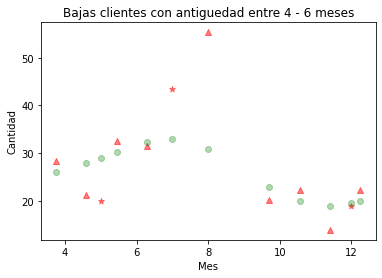

In [138]:
plt.scatter(x_valor, y_valor, c='red', marker='^', alpha=0.5)
plt.scatter(x_valor_t , y_valor_t , c='red', marker='*', alpha=0.5)
plt.scatter(x_valor, y_predic_valor, c='green', marker='o', alpha=0.3)
plt.scatter(x_valor_t , y_predic_valor_t , c='green', marker='o', alpha=0.3)
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Bajas clientes con antiguedad entre 4 - 6 meses')
plt.show()

In [139]:
#Guardamos los resultados
resul_predic_agrup2 = [] 
for _ in list(range(len(y_predic_valor))):
  resul_predic_agrup2 = y_predic_valor

resul_predic_agrup2_t = [] 
for _ in list(range(len(y_predic_valor_t))):
  resul_predic_agrup2_t = y_predic_valor_t 

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
# 3trim
#entrenamos datos
x1 = X[:,0]
x1 = x1[:,np.newaxis]
y1 = X[:,3]
y1 = y1[:,np.newaxis]

x_train, x_test, y_train, y_test = train_test_split(x1, y1,train_size = 0.8,
                                        random_state = 0,
                                        shuffle      = True
                                    )
#escalamos los datos
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train = sc_x.fit_transform(x_train)
y_train= sc_y.fit_transform(y_train)
x_test = sc_x.fit_transform(x_test)
y_test= sc_y.fit_transform(y_test)

#aplicando modelo svm
svr= SVR(kernel='rbf',degree=3, C=1.0, epsilon=0.2)
svr.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [141]:
x_valor=sc_x.inverse_transform(x_train)
y_valor= sc_y.inverse_transform(y_train)
y_predic_valor= sc_y.inverse_transform(svr.predict(x_train))
y_predic_valor

array([20.88754881, 24.03169029, 18.97816815, 23.59598356, 19.15018481,
       19.69161477, 23.769735  , 22.68474567, 21.53820839])

In [142]:
pd.DataFrame(y_valor)

,0
0,21.902595
1,25.019372
2,19.409173
3,33.746348
4,18.162462
5,15.669041
6,18.785818
7,21.279240
8,22.525950


In [143]:
x_valor_t=sc_x.inverse_transform(x_test)
y_valor_t= sc_y.inverse_transform(y_test)
y_predic_valor_t= sc_y.inverse_transform(svr.predict(x_test))
y_predic_valor_t

array([23.06223074, 20.52321527, 23.88059265])

In [144]:
pd.DataFrame(y_valor_t)

,0
0,26.5
1,15.0
2,24.0


In [145]:
#score
print(svr.score(x_train,y_train))
print(svr.score(x_test,y_test))

0.3158600886344043
0.4213427439901445


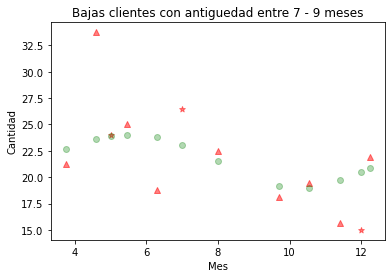

In [146]:
plt.scatter(x_valor, y_valor, c='red', marker='^', alpha=0.5)
plt.scatter(x_valor_t , y_valor_t , c='red', marker='*', alpha=0.5)
plt.scatter(x_valor, y_predic_valor, c='green', marker='o', alpha=0.3)
plt.scatter(x_valor_t , y_predic_valor_t , c='green', marker='o', alpha=0.3)
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Bajas clientes con antiguedad entre 7 - 9 meses')
plt.show()

In [147]:
#Guardamos los resultados
resul_predic_agrup3 = [] 
for _ in list(range(len(y_predic_valor))):
  resul_predic_agrup3 = y_predic_valor

resul_predic_agrup3_t = [] 
for _ in list(range(len(y_predic_valor_t))):
  resul_predic_agrup3_t = y_predic_valor_t 

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
# 4trim
#entrenamos datos
x1 = X[:,0]
x1 = x1[:,np.newaxis]
y1 = X[:,4]
y1 = y1[:,np.newaxis]

x_train, x_test, y_train, y_test = train_test_split(x1, y1,train_size = 0.8,
                                        random_state = 0,
                                        shuffle      = True
                                    )
#escalamos los datos
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train = sc_x.fit_transform(x_train)
y_train= sc_y.fit_transform(y_train)
x_test = sc_x.fit_transform(x_test)
y_test= sc_y.fit_transform(y_test)

#aplicando modelo svm
svr= SVR(kernel='rbf',degree=3, C=1.0, epsilon=0.2)
svr.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [149]:
x_valor=sc_x.inverse_transform(x_train)
y_valor= sc_y.inverse_transform(y_train)
y_predic_valor= sc_y.inverse_transform(svr.predict(x_train))
y_predic_valor

array([172.08780082, 189.18063933, 171.82118772, 194.20389524,
       173.00021927, 171.31126043, 183.24734395, 196.31317856,
       175.73826878])

In [150]:
pd.DataFrame(y_valor)

,0
0,172.606019
1,192.180934
2,170.116724
3,215.602941
4,176.000513
5,168.306327
6,177.018861
7,199.309370
8,177.358311


In [151]:
x_valor_t=sc_x.inverse_transform(x_test)
y_valor_t= sc_y.inverse_transform(y_test)
y_predic_valor_t= sc_y.inverse_transform(svr.predict(x_test))
y_predic_valor_t

array([179.20500144, 171.71550735, 192.10781363])

In [152]:
pd.DataFrame(y_valor_t)

,0
0,166.0
1,181.0
2,202.5


In [153]:
#score
print(svr.score(x_train,y_train))
print(svr.score(x_test,y_test))

0.7333390727150095
0.4524812016945418


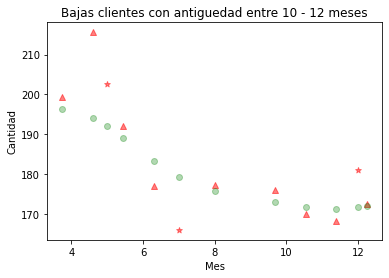

In [154]:
plt.scatter(x_valor, y_valor, c='red', marker='^', alpha=0.5)
plt.scatter(x_valor_t , y_valor_t , c='red', marker='*', alpha=0.5)
plt.scatter(x_valor, y_predic_valor, c='green', marker='o', alpha=0.3)
plt.scatter(x_valor_t , y_predic_valor_t , c='green', marker='o', alpha=0.3)
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Bajas clientes con antiguedad entre 10 - 12 meses')
plt.show()

In [156]:
#Guardamos los resultados
resul_predic_agrup4 = [] 
for _ in list(range(len(y_predic_valor))):
  resul_predic_agrup4 = y_predic_valor

resul_predic_agrup4_t = [] 
for _ in list(range(len(y_predic_valor_t))):
  resul_predic_agrup4_t = y_predic_valor_t 

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
# ENTRE_1_2_ANIOS
#entrenamos datos
x1 = X[:,0]
x1 = x1[:,np.newaxis]
y1 = X[:,5]
y1 = y1[:,np.newaxis]

x_train, x_test, y_train, y_test = train_test_split(x1, y1,train_size = 0.8,
                                        random_state = 0,
                                        shuffle      = True
                                    )
#escalamos los datos
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train = sc_x.fit_transform(x_train)
y_train= sc_y.fit_transform(y_train)
x_test = sc_x.fit_transform(x_test)
y_test= sc_y.fit_transform(y_test)

#aplicando modelo svm
svr= SVR(kernel='rbf',degree=3, C=1.0, epsilon=0.2)
svr.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [158]:
x_valor=sc_x.inverse_transform(x_train)
y_valor= sc_y.inverse_transform(y_train)
y_predic_valor= sc_y.inverse_transform(svr.predict(x_train))
y_predic_valor

array([560.65972205, 640.20238501, 570.33946021, 646.7300546 ,
       586.8157834 , 560.41269617, 631.62685575, 647.29762949,
       615.482291  ])

In [159]:
pd.DataFrame(y_valor)

,0
0,553.950907
1,651.170213
2,559.351980
3,723.891796
4,594.844742
5,548.549834
6,577.869943
7,647.890990
8,626.479595


In [160]:
x_valor_t=sc_x.inverse_transform(x_test)
y_valor_t= sc_y.inverse_transform(y_test)
y_predic_valor_t= sc_y.inverse_transform(svr.predict(x_test))
y_predic_valor_t

array([625.13524559, 559.53305688, 644.19768794])

In [163]:
pd.DataFrame(y_valor_t)

,0
0,679.5
1,603.0
2,545.5


In [164]:
#score
print(svr.score(x_train,y_train))
print(svr.score(x_test,y_test))

0.651247459907315
-0.6138378289959734


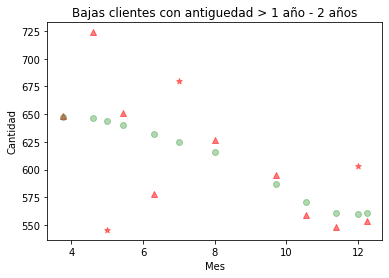

In [165]:
plt.scatter(x_valor, y_valor, c='red', marker='^', alpha=0.5)
plt.scatter(x_valor_t , y_valor_t , c='red', marker='*', alpha=0.5)
plt.scatter(x_valor, y_predic_valor, c='green', marker='o', alpha=0.3)
plt.scatter(x_valor_t , y_predic_valor_t , c='green', marker='o', alpha=0.3)
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Bajas clientes con antiguedad > 1 año - 2 años')
plt.show()

In [166]:
#Guardamos los resultados
resul_predic_agrup5 = [] 
for _ in list(range(len(y_predic_valor))):
  resul_predic_agrup5 = y_predic_valor

resul_predic_agrup5_t = [] 
for _ in list(range(len(y_predic_valor_t))):
  resul_predic_agrup5_t = y_predic_valor_t 

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
# ENTRE_3_4_ANIOS
#entrenamos datos
x1 = X[:,0]
x1 = x1[:,np.newaxis]
y1 = X[:,6]
y1 = y1[:,np.newaxis]

x_train, x_test, y_train, y_test = train_test_split(x1, y1,train_size = 0.8,
                                        random_state = 0,
                                        shuffle      = True
                                    )
#escalamos los datos
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train = sc_x.fit_transform(x_train)
y_train= sc_y.fit_transform(y_train)
x_test = sc_x.fit_transform(x_test)
y_test= sc_y.fit_transform(y_test)

#aplicando modelo svm
svr= SVR(kernel='rbf',degree=3, C=1.0, epsilon=0.2)
svr.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [168]:
x_valor=sc_x.inverse_transform(x_train)
y_valor= sc_y.inverse_transform(y_train)
y_predic_valor= sc_y.inverse_transform(svr.predict(x_train))
y_predic_valor

array([ 352.1061138 , 1112.03919327,  304.63544213, 1162.44430406,
        390.223763  ,  295.80623582, 1003.31506196, 1136.8261917 ,
        700.58447397])

In [169]:
pd.DataFrame(y_valor)

,0
0,246.249399
1,1217.677328
2,410.644894
3,1867.786789
4,246.249399
5,246.249399
6,425.589939
7,1030.864265
8,806.688589


In [170]:
x_valor_t=sc_x.inverse_transform(x_test)
y_valor_t= sc_y.inverse_transform(y_test)
y_predic_valor_t= sc_y.inverse_transform(svr.predict(x_test))
y_predic_valor_t

array([ 888.08467296,  330.51147314, 1147.66794556])

In [171]:
pd.DataFrame(y_valor_t)

,0
0,382.5
1,1470.0
2,313.5


In [172]:
#score
print(svr.score(x_train,y_train))
print(svr.score(x_test,y_test))

0.6393740399939332
-1.6732278433609853


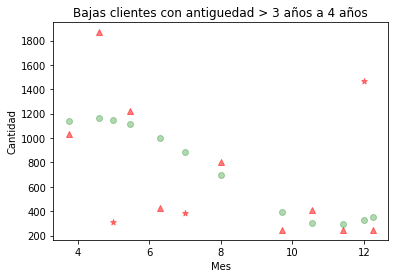

In [173]:
plt.scatter(x_valor, y_valor, c='red', marker='^', alpha=0.5)
plt.scatter(x_valor_t , y_valor_t , c='red', marker='*', alpha=0.5)
plt.scatter(x_valor, y_predic_valor, c='green', marker='o', alpha=0.3)
plt.scatter(x_valor_t , y_predic_valor_t , c='green', marker='o', alpha=0.3)
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Bajas clientes con antiguedad > 3 años a 4 años')
plt.show()

In [175]:
#Guardamos los resultados
resul_predic_agrup6 = [] 
for _ in list(range(len(y_predic_valor))):
  resul_predic_agrup6 = y_predic_valor

resul_predic_agrup6_t = [] 
for _ in list(range(len(y_predic_valor_t))):
  resul_predic_agrup6_t = y_predic_valor_t 

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
# MAS_5_ANIOS
#entrenamos datos
x1 = X[:,0]
x1 = x1[:,np.newaxis]
y1 = X[:,7]
y1 = y1[:,np.newaxis]

x_train, x_test, y_train, y_test = train_test_split(x1, y1,train_size = 0.8,
                                        random_state = 0,
                                        shuffle      = True
                                    )
#escalamos los datos
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train = sc_x.fit_transform(x_train)
y_train= sc_y.fit_transform(y_train)
x_test = sc_x.fit_transform(x_test)
y_test= sc_y.fit_transform(y_test)

#aplicando modelo svm
svr= SVR(kernel='rbf',degree=3, C=1.0, epsilon=0.2)
svr.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [177]:
x_valor=sc_x.inverse_transform(x_train)
y_valor= sc_y.inverse_transform(y_train)
y_predic_valor= sc_y.inverse_transform(svr.predict(x_train))
y_predic_valor

array([44.89625622, 78.24186045, 42.62155437, 68.79916696, 49.35016544,
       41.91970776, 84.51391214, 60.56897487, 74.84940719])

In [178]:
pd.DataFrame(y_valor)

,0
0,37.985626
1,99.402602
2,35.710923
3,61.870006
4,26.612112
5,56.183249
6,77.792926
7,56.183249
8,143.759308


In [179]:
x_valor_t=sc_x.inverse_transform(x_test)
y_valor_t= sc_y.inverse_transform(y_test)
y_predic_valor_t= sc_y.inverse_transform(svr.predict(x_test))
y_predic_valor_t

array([84.41087589, 43.82087567, 73.32772291])

In [180]:
pd.DataFrame(y_valor_t)

,0
0,72.5
1,105.0
2,21.0


In [181]:
#score
print(svr.score(x_train,y_train))
print(svr.score(x_test,y_test))

0.43102306336808294
-0.8457740174309029


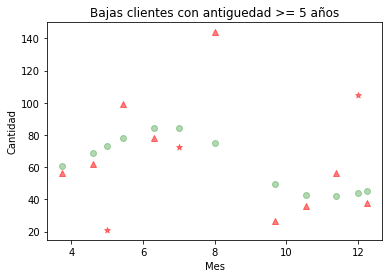

In [182]:
plt.scatter(x_valor, y_valor, c='red', marker='^', alpha=0.5)
plt.scatter(x_valor_t , y_valor_t , c='red', marker='*', alpha=0.5)
plt.scatter(x_valor, y_predic_valor, c='green', marker='o', alpha=0.3)
plt.scatter(x_valor_t , y_predic_valor_t , c='green', marker='o', alpha=0.3)
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Bajas clientes con antiguedad >= 5 años')
plt.show()

In [183]:
#Guardamos los resultados
resul_predic_agrup7 = [] 
for _ in list(range(len(y_predic_valor))):
  resul_predic_agrup7 = y_predic_valor

resul_predic_agrup7_t = [] 
for _ in list(range(len(y_predic_valor_t))):
  resul_predic_agrup7_t = y_predic_valor_t 